#Data Preprocess
##Introduction
This project is Exploratory Data Analysis (EDA) to find out what factors affect student scores. The dataset was obtained from https://archive.ics.uci.edu/ml/datasets/Student+Performance. Lastly, this project is only for learning activities at the ongoing data science bootcamp.

###Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

###Importing Dataset

In [2]:
student_por=pd.read_csv("student-por.csv",sep=";")
student_mat=pd.read_csv("student-mat.csv",sep=";")

In [3]:
student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
student_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
#Since all the columns in both datasets are the same, so we put them together
student=pd.concat([student_por,student_mat])
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


###Data Cleaning

In [6]:
student.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
student.shape

(1044, 33)

The dataset have 5339 rows and 47 columns. The columns represent various characteristics of each unit, and is described as follows.

1. School - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min, 2 -15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)



In [8]:
#Check missing value 
student.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
#Check duplicated value
student.duplicated().sum()

0

The data is very clean so we can do Exploratory Data Analysis

##Exploratory Data Analysis

###School

In [11]:
student.school.value_counts()
#The number of students in GP schools is almost 3 times higher than MS school data.
#But because there is no information about the differences between the two schools, 
#the initial assumption of the two data is the same, especially since the factor analyzed here comes from students side, not the school.

GP    772
MS    272
Name: school, dtype: int64

###Sex

In [12]:
student.sex.value_counts()
#This data can be labeled encoding for modelling

F    591
M    453
Name: sex, dtype: int64

###Age

16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64


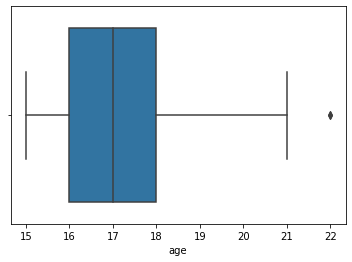

In [13]:
print(student.age.value_counts())
sns.boxplot(data=student, x='age')

In [14]:
#We drop outliers data cause it's data seem to far (old) than others 
i = student[(student['age'] == 22)].index
student.drop(i, inplace=True)

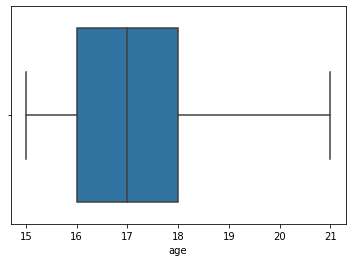

In [15]:
sns.boxplot(data=student, x='age')

###Address

In [16]:
student.address.value_counts()
#More students live in cities (U) than in villages (R)

U    755
R    285
Name: address, dtype: int64

###Famsize

In [17]:
student.famsize.value_counts()
#More students who have family members more than 3

GT3    735
LE3    305
Name: famsize, dtype: int64

###Pstatus

In [18]:
student.Pstatus.value_counts()
#More students live with their families than alone

T    919
A    121
Name: Pstatus, dtype: int64

###Medu & Fedu 

In [19]:
#Correlation check 
student['Medu'].corr(student['Fedu'])
#It turns out that there is no strong correlation between educated fathers and educated mothers

0.6432813464927233

In [20]:
student.Medu.value_counts()

4    304
2    289
3    236
1    202
0      9
Name: Medu, dtype: int64

In [21]:
student.Fedu.value_counts()

2    324
1    254
3    230
4    223
0      9
Name: Fedu, dtype: int64

###Mjob & Fjob

In [22]:
#Since Medu & Fedu have no correlation, we assume also Job & Fjob are uncorrelated. 
#But in modeling we will check multicollinearity between variables
student.Mjob.value_counts()

other       399
services    237
at_home     194
teacher     129
health       81
Name: Mjob, dtype: int64

In [23]:
student.Fjob.value_counts()

other       583
services    289
teacher      65
at_home      62
health       41
Name: Fjob, dtype: int64

###Reason

In [24]:
student.reason.value_counts()

course        429
home          258
reputation    247
other         106
Name: reason, dtype: int64

###Guardian

In [25]:
student.guardian.value_counts()

mother    725
father    242
other      73
Name: guardian, dtype: int64

###Traveltime

In [26]:
student.traveltime.value_counts()

1    620
2    319
3     77
4     24
Name: traveltime, dtype: int64

###Studytime

In [27]:
student.studytime.value_counts()

2    502
1    314
3    162
4     62
Name: studytime, dtype: int64

###Failures

In [28]:
student.failures.value_counts()
#This column means students who have failed to advance to the previous grade. 
#It's great because most of the students always move up the grade

0    859
1    120
2     33
3     28
Name: failures, dtype: int64

###Schoolsup

In [29]:
student.schoolsup.value_counts()

no     921
yes    119
Name: schoolsup, dtype: int64

###Famsup

In [30]:
student.famsup.value_counts()

yes    639
no     401
Name: famsup, dtype: int64

###Paid

In [31]:
student.paid.value_counts()

no     821
yes    219
Name: paid, dtype: int64

###Activities

In [32]:
student.activities.value_counts()

no     526
yes    514
Name: activities, dtype: int64

###Nursery 

In [33]:
student.nursery.value_counts()

yes    833
no     207
Name: nursery, dtype: int64

###Higher 

In [34]:
student.higher.value_counts()

yes    953
no      87
Name: higher, dtype: int64

###Internet 

In [35]:
student.internet.value_counts()

yes    823
no     217
Name: internet, dtype: int64

###Romantic 

In [36]:
student.romantic.value_counts()

no     671
yes    369
Name: romantic, dtype: int64

###Famrel 

In [37]:
student.famrel.value_counts()

4    510
5    284
3    169
2     47
1     30
Name: famrel, dtype: int64

###Freetime 

In [38]:
student.freetime.value_counts()

3    408
4    291
2    169
5    108
1     64
Name: freetime, dtype: int64

###Goout 

In [39]:
student.goout.value_counts()

3    334
2    248
4    226
5    161
1     71
Name: goout, dtype: int64

### Dalc 

In [40]:
student.Dalc.value_counts()

1    726
2    195
3     69
4     26
5     24
Name: Dalc, dtype: int64

### Walc 

In [41]:
student.Walc.value_counts()

1    398
2    234
3    200
4    137
5     71
Name: Walc, dtype: int64

### Health 

In [42]:
student.health.value_counts()

5    395
3    215
4    174
1    133
2    123
Name: health, dtype: int64

### Absences 

0     358
2     175
4     146
6      80
8      63
10     38
12     23
14     20
5      17
16     16
1      15
3      15
9      10
7      10
11      8
18      8
15      5
22      5
13      4
20      4
21      3
26      2
30      2
24      2
75      1
23      1
40      1
38      1
19      1
54      1
28      1
56      1
25      1
32      1
17      1
Name: absences, dtype: int64


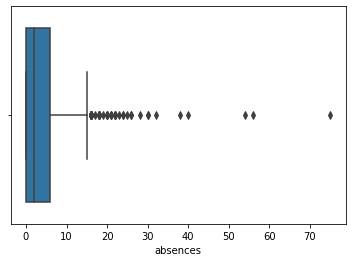

In [43]:
print(student.absences.value_counts())
sns.boxplot(data=student, x='absences')

In [44]:
#We remove outliers because some large numbers of outliers only have a frequency of 1, such as 75, 54, 56 etc
Q1 = student['absences'].quantile(0.25)
Q3 = student['absences'].quantile(0.75)
IQR = Q3 - Q1

Lower_Whisker = Q1 - (1.5 * IQR)
Upper_Whisker = Q3 + (1.5 * IQR)

new_absences = student[(student['absences'] >= Lower_Whisker) & 
               (student['absences'] <= Upper_Whisker)]
       

In [45]:
student = new_absences

0     358
2     175
4     146
6      80
8      63
10     38
12     23
14     20
5      17
1      15
3      15
9      10
7      10
11      8
15      5
13      4
Name: absences, dtype: int64


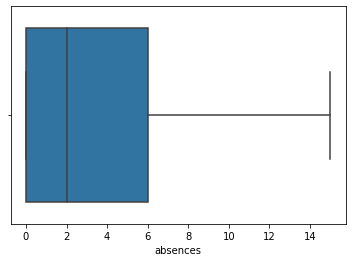

In [46]:
print(student.absences.value_counts())
sns.boxplot(data=student, x='absences')

In [47]:
student

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In this step we will create an annual average grade from columns G1, G2 and G3 and given a new column named `average_grade`. This column will be the object we are analyzing, therefore the G1, G2, and G3 columns will be deleted.

In [48]:
#create average_grade column
student['Average Grades'] = student[['G1', 'G2', 'G3']].mean(axis='columns')
student

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Average Grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,7.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,10.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,12.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,14.000000
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,12.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,9.000000
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,15.333333
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,8.333333
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,11.000000


In [49]:
student['Average Grades'].max()

19.333333333333332

In [50]:
#Range average grade student 
def range_grade(average_grade):
  if (average_grade >= 15):
    return ("Very Good")
  elif (average_grade < 15 and average_grade >= 11):
    return ("Good")
  elif (average_grade < 11 and average_grade >= 6):
    return ("Average")
  elif (average_grade < 6):
    return ("Low")

student["Grades"]=student['Average Grades'].apply(range_grade)

In [51]:
student.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 0 to 394
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   school          987 non-null    object 
 1   sex             987 non-null    object 
 2   age             987 non-null    int64  
 3   address         987 non-null    object 
 4   famsize         987 non-null    object 
 5   Pstatus         987 non-null    object 
 6   Medu            987 non-null    int64  
 7   Fedu            987 non-null    int64  
 8   Mjob            987 non-null    object 
 9   Fjob            987 non-null    object 
 10  reason          987 non-null    object 
 11  guardian        987 non-null    object 
 12  traveltime      987 non-null    int64  
 13  studytime       987 non-null    int64  
 14  failures        987 non-null    int64  
 15  schoolsup       987 non-null    object 
 16  famsup          987 non-null    object 
 17  paid            987 non-null    obj

#Data Visualization
Which factor affected for annual student grade

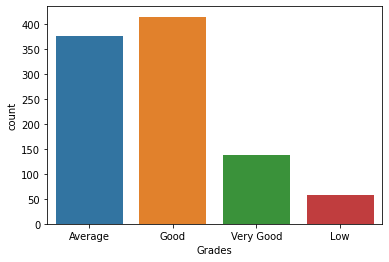

In [52]:
#Total grade student
sns.countplot(x=student["Grades"])

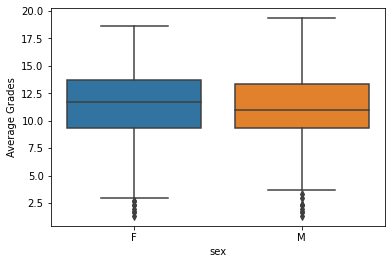

In [53]:
#Total grade student by sex
sns.boxplot(x="sex", y="Average Grades", data=student)
school_counts=student["sex"].value_counts()

#sex have a little affect student grades

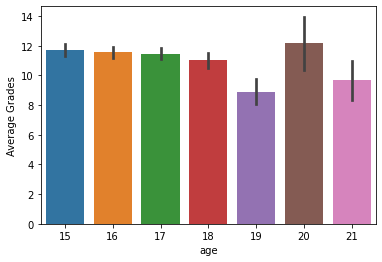

In [54]:
#Total grade student by age
sns.barplot(x="age", y="Average Grades", data=student)

#age doesn't really affect student grades. 

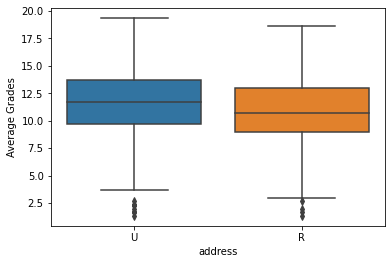

In [55]:
#Total grade student by adress
sns.boxplot(x="address", y="Average Grades", data=student)

#adress affect a little bit student grades. Student who lived in urban have a little bigger grade than rural

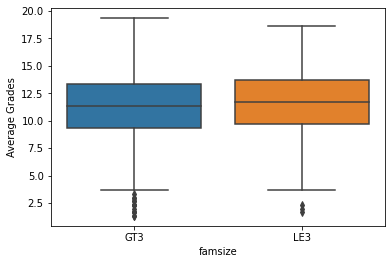

In [56]:
#Total grade student by famsize
sns.boxplot(x="famsize", y="Average Grades", data=student)

#famsize have a little affect for student grades

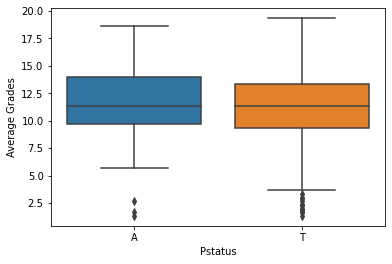

In [57]:
#Total grade student by pstatus
sns.boxplot(x="Pstatus", y="Average Grades", data=student)

#pstatus have affect for student grades

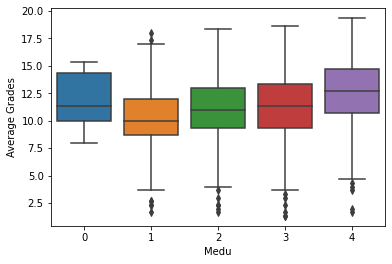

In [58]:
#Total grade student by medu 
sns.boxplot(x="Medu", y="Average Grades", data=student)

#medu have affect for student grades

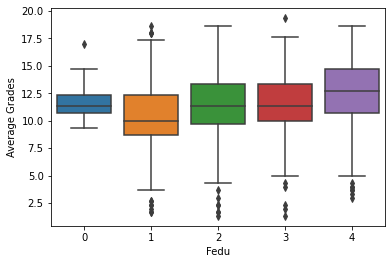

In [59]:
#Total grade student by fedu
sns.boxplot(x="Fedu", y="Average Grades", data=student)

#fedu have affect for student grades

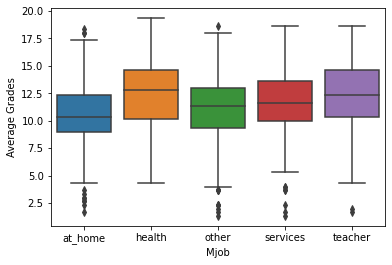

In [60]:
#Total grade student by mjob
sns.boxplot(x="Mjob", y="Average Grades", data=student)

#Mjob have an impact for student grades

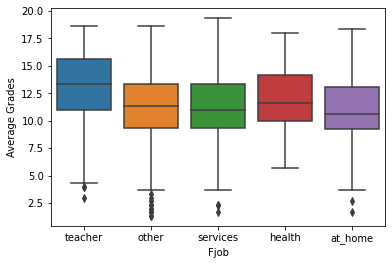

In [61]:
#Total grade student by fjob
sns.boxplot(x="Fjob", y="Average Grades", data=student)

# Fjob have an impact for student grades

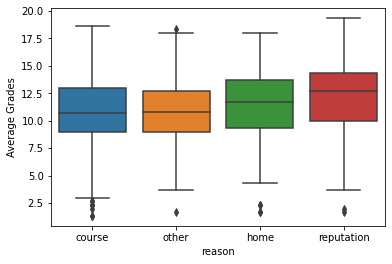

In [62]:
#Total grade student by reason
sns.boxplot(x="reason", y="Average Grades", data=student)

#reason have an impact for student grades

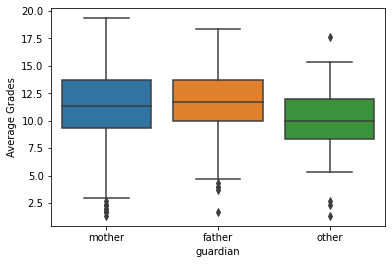

In [64]:
#Total grade student by guardian
sns.boxplot(x="guardian", y="Average Grades", data=student)

#Guardian have an impact for student grades

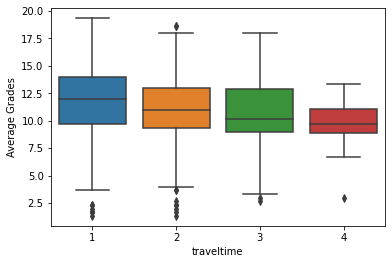

In [65]:
#Total grade student by traveltime
sns.boxplot(x="traveltime", y="Average Grades", data=student)

#Traveltime have an impact for student grades

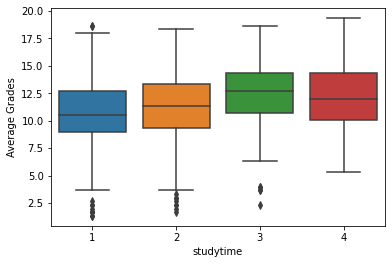

In [66]:
#Total grade student by studytime
sns.boxplot(x="studytime", y="Average Grades", data=student)

#Studytime have an impact for student grades

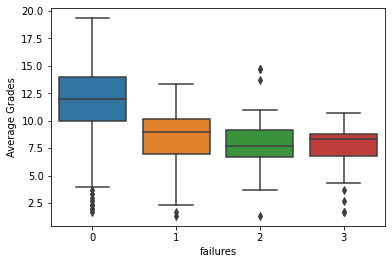

In [67]:
#Total grade student by failures
sns.boxplot(x="failures", y="Average Grades", data=student)

#Failures have an impact for student grades

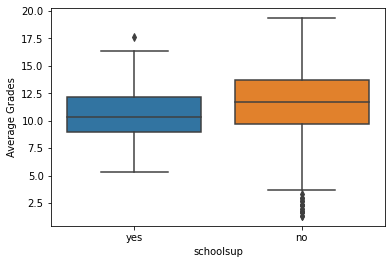

In [68]:
#Total grade student by schoolsup
sns.boxplot(x="schoolsup", y="Average Grades", data=student)

#Schoolsup have an impact for student grades

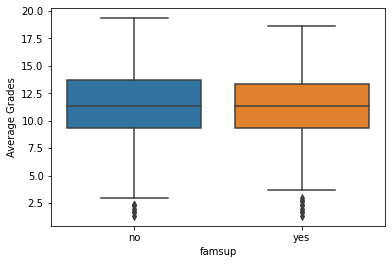

In [69]:
#Total grade student by famsup
sns.boxplot(x="famsup", y="Average Grades", data=student)

#Famsup have an impact for student grades

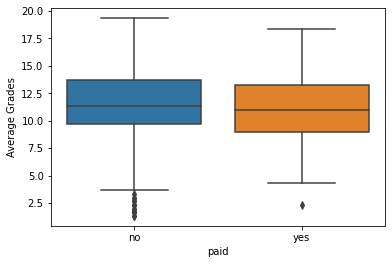

In [70]:
#Total grade student by paid
sns.boxplot(x="paid", y="Average Grades", data=student)

#Paid have a little impact for student grades

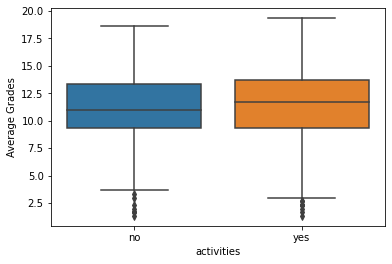

In [71]:
#Total grade student by activities
sns.boxplot(x="activities", y="Average Grades", data=student)

#activities have affect for student grades

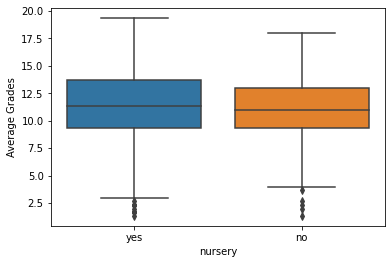

In [72]:
#Total grade student by nursery
sns.boxplot(x="nursery", y="Average Grades", data=student)

#nursery have affect for student grades

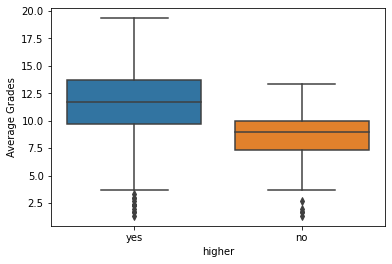

In [73]:
#Total grade student by higher
sns.boxplot(x="higher", y="Average Grades", data=student)

#Higher have an impact for student grades

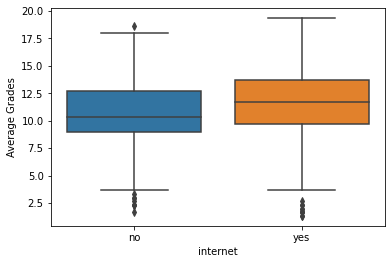

In [74]:
#Total grade student by internet
sns.boxplot(x="internet", y="Average Grades", data=student)

#Internet have an impact for student grades

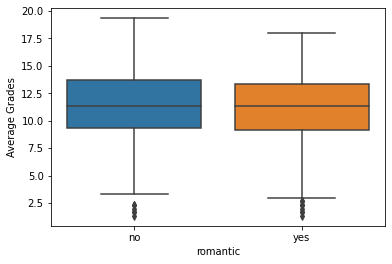

In [75]:
#Total grade student by romantic
sns.boxplot(x="romantic", y="Average Grades", data=student)

#romantic have an impact for student grades

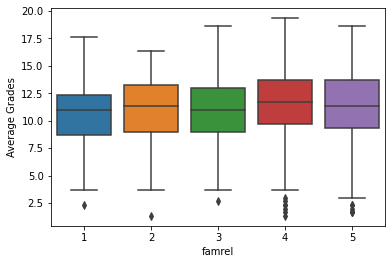

In [76]:
#Total grade student by famrel
sns.boxplot(x="famrel", y="Average Grades", data=student)

#Famrel have an impact for student grades

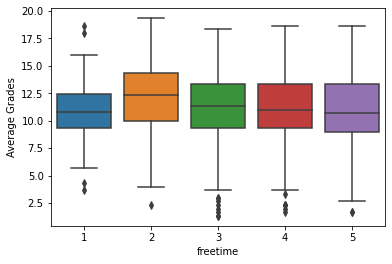

In [77]:
#Total grade student by freetime
sns.boxplot(x="freetime", y="Average Grades", data=student)

#Freetime have an impact for student grades

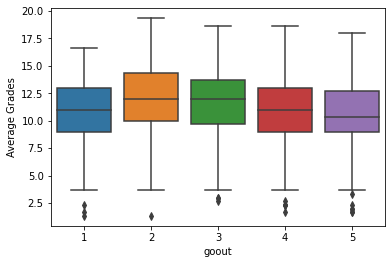

In [78]:
#Total grade student by goout
sns.boxplot(x="goout", y="Average Grades", data=student)

#goout have an impact for student grades

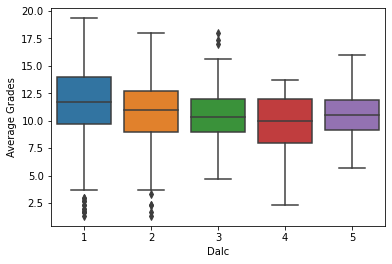

In [79]:
#Total grade student by dalc
sns.boxplot(x="Dalc", y="Average Grades", data=student)

#Dalc have an impact for student grades

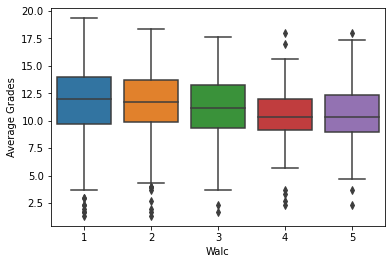

In [80]:
#Total grade student by walc
sns.boxplot(x="Walc", y="Average Grades", data=student)

#Walc have an impact for student grades

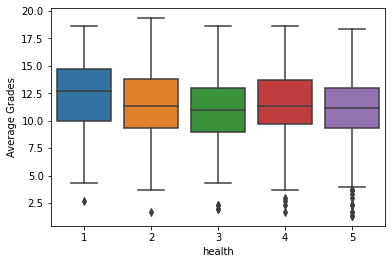

In [81]:
#Total grade student by health
sns.boxplot(x="health", y="Average Grades", data=student)

#health have an impact for student grades

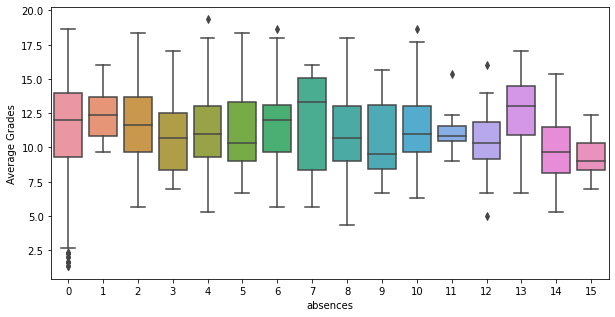

In [82]:
#Total grade student by absences
fig = plt.subplots(figsize=(10,5))
sns.boxplot(x="absences", y="Average Grades", data=student)

#absences have various impact for student grades. We will see an impact more in modelling

In this session we have identified the variables that affect a student's annual grade. We will remove some features that have no effect to `Average_Grades`

In [83]:
student

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Average Grades,Grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,7.333333,Average
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,10.333333,Average
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,12.333333,Good
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,14.000000,Good
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,12.333333,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,4,4,5,4,11,9,9,9,9.000000,Average
391,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,3,14,16,16,15.333333,Very Good
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,3,3,10,8,7,8.333333,Average
393,MS,M,18,R,LE3,T,3,2,services,other,...,1,3,4,5,0,11,12,10,11.000000,Good


In [84]:
student = student.drop(['school','G1','G2', 'G3'], axis=1)


In [85]:
student.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 0 to 394
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             987 non-null    object 
 1   age             987 non-null    int64  
 2   address         987 non-null    object 
 3   famsize         987 non-null    object 
 4   Pstatus         987 non-null    object 
 5   Medu            987 non-null    int64  
 6   Fedu            987 non-null    int64  
 7   Mjob            987 non-null    object 
 8   Fjob            987 non-null    object 
 9   reason          987 non-null    object 
 10  guardian        987 non-null    object 
 11  traveltime      987 non-null    int64  
 12  studytime       987 non-null    int64  
 13  failures        987 non-null    int64  
 14  schoolsup       987 non-null    object 
 15  famsup          987 non-null    object 
 16  paid            987 non-null    object 
 17  activities      987 non-null    obj

In [86]:
student.to_csv (r'clean_student_grades.csv', index = False, header=True)

In this session what has been done is:
- removed uninsightful columns
- checked outliers
- visualize features

In the next step, we will do modeling to find out what variables have the most influence on students' annual scores.